# Градиентный спуск для функции нескольких переменных (векторная форма)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random

RANDOM_STATE = 42
np.random.RandomState(RANDOM_STATE);

Создадим таблицу с данными

In [3]:
df = pd.DataFrame({'x1':[10,5,7], 'x2': [40,36,30], 'y':[100,73,71]})
df

,x1,x2,y
0,10,40,100
1,5,36,73
2,7,30,71


In [4]:
def compute_cost(X,y, theta):
    m = len(y)
    
    cost = (1/m)*(np.linalg.norm(X @ theta - y)**2)
    return cost

In [6]:
def gradient_descent(X, y, learning_rate, iterations):
    # добавляем к Х столбец из 1
    X = np.hstack((np.ones((X.shape[0],1)), X)) 
    params = np.random.rand(X.shape[1])
    
    m = X.shape[0]
    
    cost_track = np.zeros((iterations, 1))
    
    for i in range(iterations):
        params = params -2/m * learning_rate * (X.T @ ((X@params) - y))
        cost_track[i] = compute_cost(X, y, params)
        
    return cost_track, params

In [7]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0],1)),X))
    return X @ params

Применим градиентный спуск

In [8]:
track, weights = gradient_descent(df[['x1','x2']], df['y'], 0.0001, 5000)
print(weights)

[0.48056104 3.97103617 1.46738401]


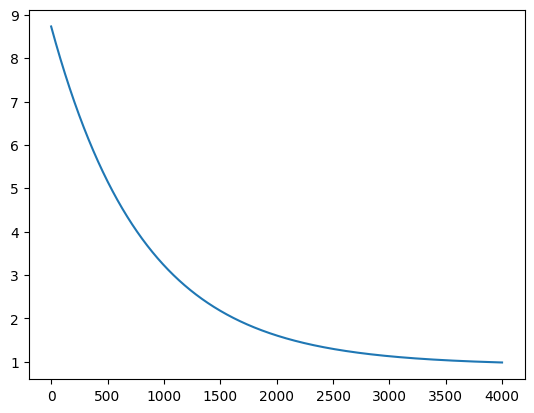

In [13]:
plt.plot(track[1000:])